This document investigates the darks from FUN-040-01-1. Some preliminary conclusions are:

- This dataset is better for readout noise analysis since NDIT=1. From 2-second readouts, I estimate the read noise to be around 4.33-4.34 ADU (slightly differing for readout schemes).
- Note that noise drops as the exposure time increases in UTR. This was confusing to me at first. After investigating, I found that the exposure time in UTR mode is controlled by NDSAMPLES. This is fine although it is difficult to estimate the actual read noise when NDSAMPLES > 2 since the noise doesn't exactly scale with 1/sqrt(NDSAMPLES).
- Upper limit to dark current is around 0.04 ADU/s/pixel. Note that this is obtained as (median_signal/exposure time). Since NDSAMPLES values are different for exposure times, it is difficult to confirm this from the noise.
- Another thing that I am confused is the net exposure time in UTR mode. It should be multiples of frame time (1.59 secs) since NDSAMPLES of 2, 7, 38 are assigned to exposure times of 2, 10, 60 seconds. So, the net exposure times are actually 1.6, 9.6, 58.8 seconds respectively (right?). But, in the header, these values are only noted under MINDIT which is actually minimum integration time for a given NDSAMPLES - not the net exposure time. Therefore, when the given exposure time is greater than 1.59x64, eg. 1200 seconds, MINDIT is 1.59x64 but the real exposure time is nowhere to be found in the header.


In [1]:
from pylab import *
FRM_TIME = 1.59
ND_SAMPLES = array([2., 7., 38.])
print FRM_TIME*(ND_SAMPLES-1)

[ 1.59  9.54 58.83]


In [2]:
from NIX_Testing import NIX_Image_List, NIX_Image, doGridAnalysis
from astropy.io import fits
from lmfit.models import GaussianModel

data_dir = '/home/ydallilar/Documents/NIX/nixDetBackup'

test_ids = ['FUN-040-01-1-a', 'FUN-040-01-1-b']
config = {'test_ids' : test_ids, 'data_dir' : data_dir}
NIX_GL = NIX_Image_List(config)

In [3]:
keywords = ['MJD-OBS', 'HIERARCH ESO DET READ CURNAME', 'HIERARCH ESO DET SEQ1 DIT']
tbl_fmt = '%15s,%35s,%20s,%20s%10s'

NIX_GL.printTable(keywords, tbl_fmt)

 NDX        TEST_ID,                           FILENAME,             MJD-OBS,    DET_READ_CURNAMEDET_SEQ1_DIT
0000 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0007.fits,       58707.7510148,    SLOW_UP_THE_RAMP       2.0
0001 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0008.fits,       58707.7513599,         SLOW_LR_CDS       2.0
0002 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0009.fits,       58707.7516898,      SLOW_LR_FOWLER       2.0
0003 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0010.fits,       58707.7520057,    SLOW_UP_THE_RAMP      10.0
0004 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0011.fits,       58707.7525607,         SLOW_LR_CDS      10.0
0005 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0012.fits,       58707.7530783,      SLOW_LR_FOWLER      10.0
0006 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0013.fits,       58707.7535787,    SLOW_UP_THE_RAMP      60.0
0007 FUN-040-01-1-a,    ERIS_NIX_CAL_DARKS224_0014.fits,       58707.7554068,         SLOW_LR_CDS      60.0
0008 FUN-040-01-1-a,    ER

 NDX        TEST_ID,                           FILENAME,             MJD-OBS,  DET_NDSAMPLES,  DET_NDIT
0000 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0025.fits,        58708.993951,              2,         3
0001 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0026.fits,       58708.9942528,              2,         3
0002 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0027.fits,       58708.9945083,              2,         3
0003 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0028.fits,        58708.994784,              7,         3
0004 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0029.fits,       58708.9954811,              7,         3
0005 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0030.fits,       58708.9961462,              7,         3
0006 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0031.fits,       58708.9968286,             38,         3
0007 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0032.fits,        58709.000058,             38,         3
0008 FUN-040-01-1-b,    ERIS_NIX_CAL_DARKS226_0033.fits,       5

/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


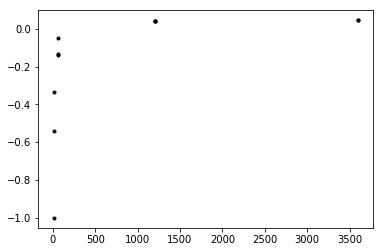

In [4]:
NIX_GL.filter(slice(462, 476, 1))
keywords = ['MJD-OBS', 'HIERARCH ESO DET NDSAMPLES', 'HIERARCH ESO DET NDIT']
tbl_fmt = '%15s,%35s,%20s,%15s,%10s'

NIX_GL.printFiltered(keywords, tbl_fmt)
meds = NIX_GL.getMedian(dark=NIX_GL[0])
exp = array(NIX_GL.getHeaderValue('HIERARCH ESO DET SEQ1 DIT'))
print meds/(exp-exp[0])
plot(exp, meds/(exp-exp[0]), 'k.')
show()


In [5]:
RNs = []
def doAnalysis(select, suffix):
    
    print select, suffix
    NIX_GL.filter(select)
    res = sqrt(NIX_GL.getPixelVariance(shift=True))
    
    res1d = ravel(res)

    f, ax = subplots()
    hist, bins = histogram(res1d, 100, range=[0, 10])
    bins = (bins[1:] + bins[:-1])/2.

    model = GaussianModel()
    pars = model.guess(hist, x=bins)
    out = model.fit(hist, pars, x=bins)
    print out.fit_report()

    RNs.append(out.best_values['center'])
    
    ax.plot(bins, hist, 'k', drawstyle='steps-mid')
    ax.plot(bins, out.best_fit, 'r--')
    
    ax2 = ax.twinx()
    
    cums = cumsum(hist)/(2048.*2048)*100
    
    ax2.plot(bins, cums, 'g-', drawstyle='steps-mid')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylabel('Cumulative (%)', color='g')
    ax2.set_ylim([0, 100])

    lims = [min(bins[where(cums > 97)[0]])]

    print lims
    
    figure()
    for i in range(len(lims)):
        ax2.plot([lims[i], lims[i]], [0, 100], 'g--')
        
        figure(figsize=(8,8))
        out = zeros([2048, 2048])
        out[where(res > lims[i])] = 1
        imshow(out, cmap=cm.gray, origin='lower')

    show()
    fits.PrimaryHDU(res).writeto('out/Dark_Variance_%s.fits' % suffix, overwrite=True)

In [6]:
selects = [slice(12,62,1),slice(62,112,1),slice(112,162,1),\
           slice(162,212,1),slice(212,262,1),slice(262,312,1),\
           slice(312,362,1),slice(362,412,1),slice(412,462,1)]
suffixes = ['UTR_2sec', 'UTR_10sec', 'UTR_60sec',\
            'CDS_2sec', 'CDS_10sec', 'CDS_60sec', \
            'FWLR_2sec', 'FWLR_10sec', 'FWLR_60sec']

slice(12, 62, 1) UTR_2sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 3.1408e+09
    reduced chi-square = 32379088.7
    Akaike info crit   = 1732.25642
    Bayesian info crit = 1740.07193
[[Variables]]
    sigma:      0.56820707 +/- 0.00512845 (0.90%) (init = 0.6)
    center:     4.34619602 +/- 0.00512847 (0.12%) (init = 4.35)
    amplitude:  400153.980 +/- 3127.78003 (0.78%) (init = 509972.4)
    fwhm:       1.33802538 +/- 0.01207658 (0.90%) == '2.3548200*sigma'
    height:     280951.007 +/- 2196.04122 (0.78%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[6.75]


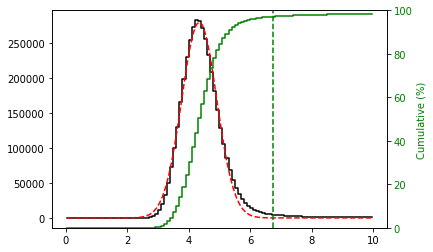

<Figure size 432x288 with 0 Axes>

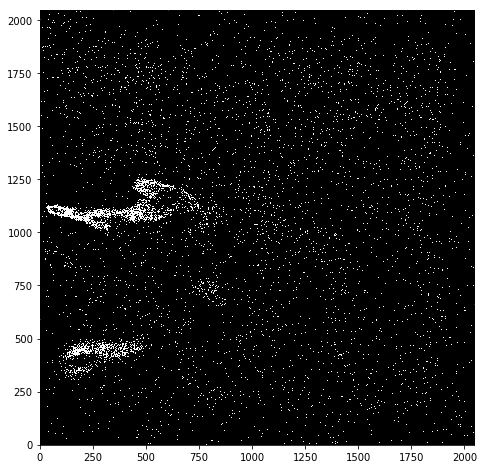

slice(62, 112, 1) UTR_10sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 3.7785e+09
    reduced chi-square = 38953625.3
    Akaike info crit   = 1750.74232
    Bayesian info crit = 1758.55783
[[Variables]]
    sigma:      0.47611769 +/- 0.00433393 (0.91%) (init = 0.5)
    center:     3.68414608 +/- 0.00433393 (0.12%) (init = 3.65)
    amplitude:  398363.661 +/- 3140.35361 (0.79%) (init = 503890.5)
    fwhm:       1.12117145 +/- 0.01020563 (0.91%) == '2.3548200*sigma'
    height:     333791.666 +/- 2631.32284 (0.79%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[6.050000000000001]


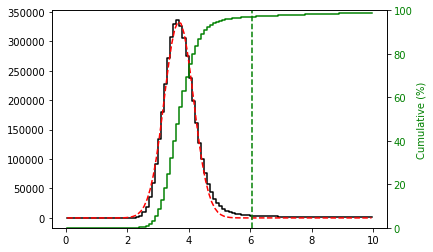

<Figure size 432x288 with 0 Axes>

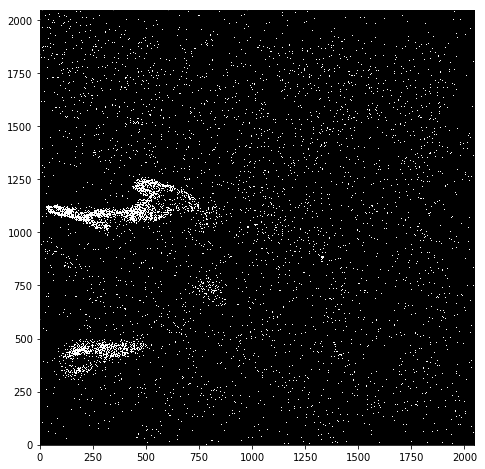

slice(112, 162, 1) UTR_60sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 100
    # variables        = 3
    chi-square         = 6.7513e+09
    reduced chi-square = 69601532.3
    Akaike info crit   = 1808.78379
    Bayesian info crit = 1816.59930
[[Variables]]
    sigma:      0.32293895 +/- 0.00325508 (1.01%) (init = 0.3)
    center:     2.36780252 +/- 0.00325508 (0.14%) (init = 2.35)
    amplitude:  396044.658 +/- 3457.13707 (0.87%) (init = 443986.2)
    fwhm:       0.76046310 +/- 0.00766513 (1.01%) == '2.3548200*sigma'
    height:     489253.363 +/- 4270.76821 (0.87%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[4.550000000000001]


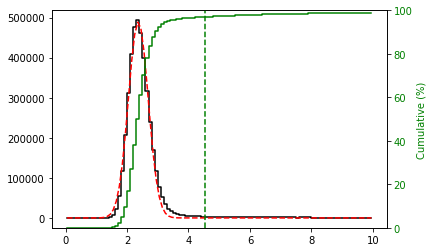

<Figure size 432x288 with 0 Axes>

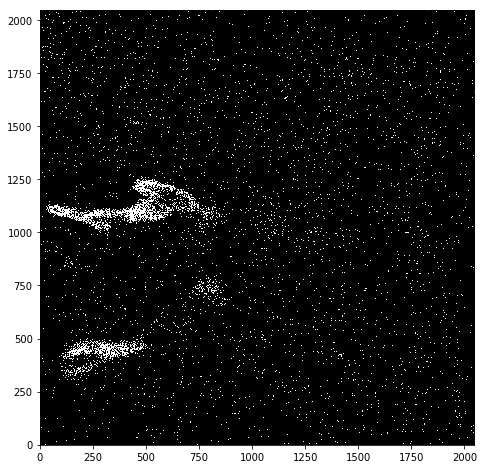

slice(162, 212, 1) CDS_2sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 100
    # variables        = 3
    chi-square         = 2.9666e+09
    reduced chi-square = 30583346.7
    Akaike info crit   = 1726.55070
    Bayesian info crit = 1734.36621
[[Variables]]
    sigma:      0.55500749 +/- 0.00481389 (0.87%) (init = 0.6)
    center:     4.32267196 +/- 0.00481390 (0.11%) (init = 4.35)
    amplitude:  399956.254 +/- 3004.28097 (0.75%) (init = 520617.6)
    fwhm:       1.30694274 +/- 0.01133585 (0.87%) == '2.3548200*sigma'
    height:     287490.655 +/- 2159.49377 (0.75%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[6.65]


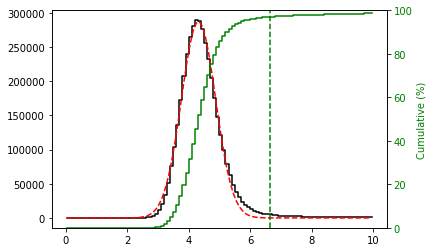

<Figure size 432x288 with 0 Axes>

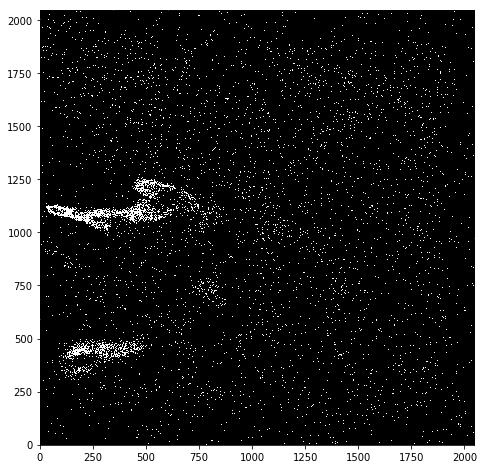

slice(212, 262, 1) CDS_10sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 100
    # variables        = 3
    chi-square         = 3.1272e+09
    reduced chi-square = 32239155.7
    Akaike info crit   = 1731.82331
    Bayesian info crit = 1739.63882
[[Variables]]
    sigma:      0.57480629 +/- 0.00522274 (0.91%) (init = 0.65)
    center:     4.41585744 +/- 0.00522274 (0.12%) (init = 4.4)
    amplitude:  398928.073 +/- 3139.07272 (0.79%) (init = 542817.6)
    fwhm:       1.35356536 +/- 0.01229860 (0.91%) == '2.3548200*sigma'
    height:     276874.635 +/- 2178.66364 (0.79%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[7.050000000000001]


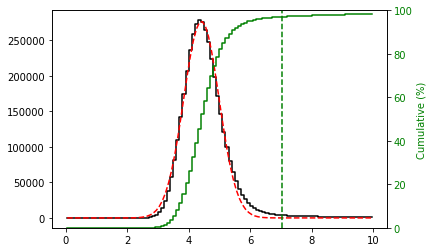

<Figure size 432x288 with 0 Axes>

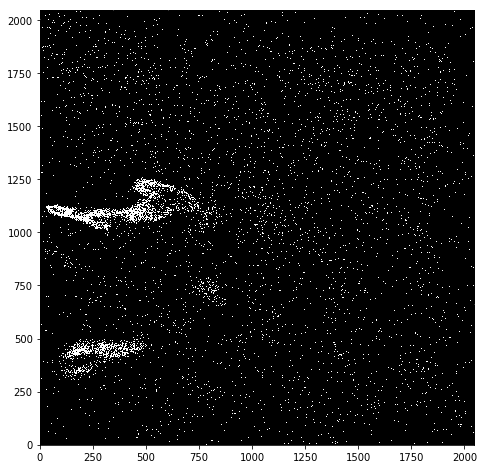

slice(262, 312, 1) CDS_60sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 3.0015e+09
    reduced chi-square = 30943395.2
    Akaike info crit   = 1727.72109
    Bayesian info crit = 1735.53660
[[Variables]]
    sigma:      0.58647314 +/- 0.00529563 (0.90%) (init = 0.6)
    center:     4.54575201 +/- 0.00529564 (0.12%) (init = 4.55)
    amplitude:  397244.346 +/- 3106.40012 (0.78%) (init = 489403.8)
    fwhm:       1.38103869 +/- 0.01247026 (0.90%) == '2.3548200*sigma'
    height:     270221.364 +/- 2113.09865 (0.78%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[7.8500000000000005]


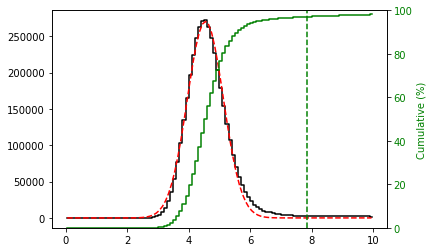

<Figure size 432x288 with 0 Axes>

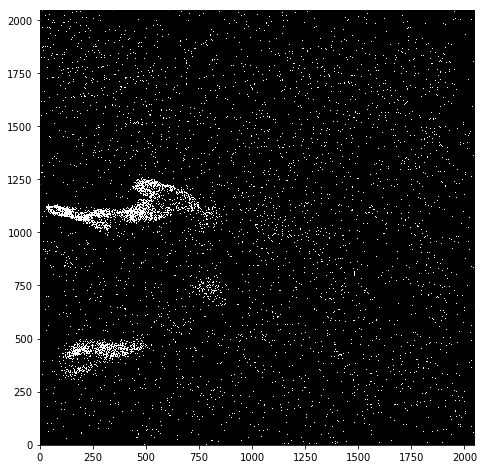

slice(312, 362, 1) FWLR_2sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 100
    # variables        = 3
    chi-square         = 3.0369e+09
    reduced chi-square = 31307848.4
    Akaike info crit   = 1728.89202
    Bayesian info crit = 1736.70753
[[Variables]]
    sigma:      0.57850833 +/- 0.00517561 (0.89%) (init = 0.65)
    center:     4.39961665 +/- 0.00517562 (0.12%) (init = 4.4)
    amplitude:  400541.664 +/- 3103.34572 (0.77%) (init = 543745.8)
    fwhm:       1.36228298 +/- 0.01218764 (0.89%) == '2.3548200*sigma'
    height:     276215.578 +/- 2140.08415 (0.77%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[6.65]


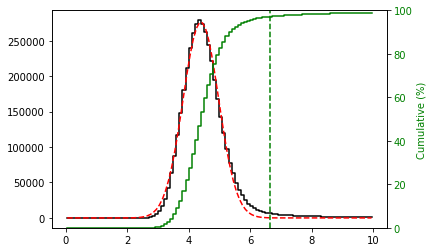

<Figure size 432x288 with 0 Axes>

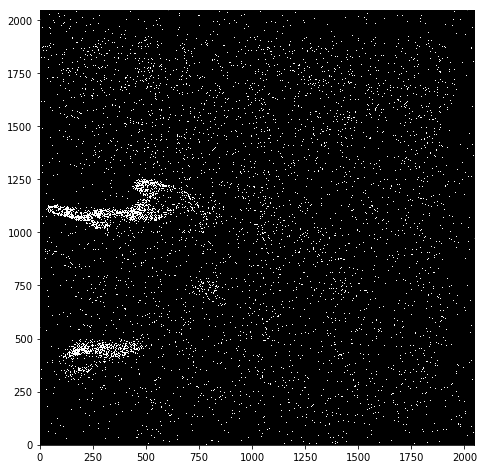

slice(362, 412, 1) FWLR_10sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 3.3396e+09
    reduced chi-square = 34428419.5
    Akaike info crit   = 1738.39337
    Bayesian info crit = 1746.20888
[[Variables]]
    sigma:      0.58088561 +/- 0.00548199 (0.94%) (init = 0.6)
    center:     4.44944674 +/- 0.00548200 (0.12%) (init = 4.45)
    amplitude:  399002.993 +/- 3261.02016 (0.82%) (init = 494919)
    fwhm:       1.36788105 +/- 0.01290910 (0.94%) == '2.3548200*sigma'
    height:     274028.430 +/- 2239.61552 (0.82%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[6.95]


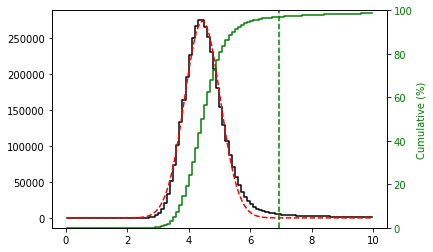

<Figure size 432x288 with 0 Axes>

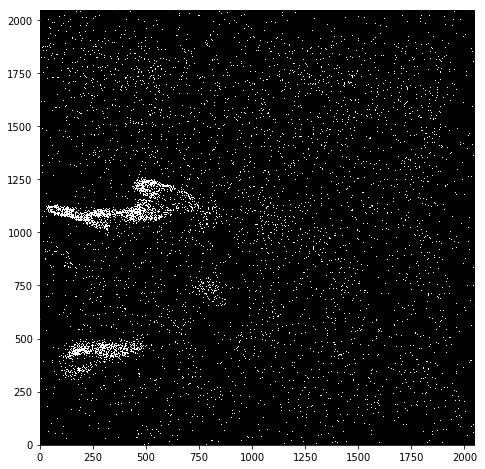

slice(412, 462, 1) FWLR_60sec
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 2.8132e+09
    reduced chi-square = 29002221.1
    Akaike info crit   = 1721.24238
    Bayesian info crit = 1729.05789
[[Variables]]
    sigma:      0.59972971 +/- 0.00529829 (0.88%) (init = 0.65)
    center:     4.61104521 +/- 0.00529830 (0.11%) (init = 4.6)
    amplitude:  397497.443 +/- 3041.19229 (0.77%) (init = 519918.7)
    fwhm:       1.41225552 +/- 0.01247652 (0.88%) == '2.3548200*sigma'
    height:     264416.688 +/- 2023.01557 (0.77%) == '0.3989423*amplitude/max(2.22044604925e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577
[7.75]


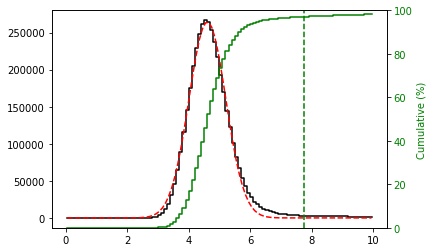

<Figure size 432x288 with 0 Axes>

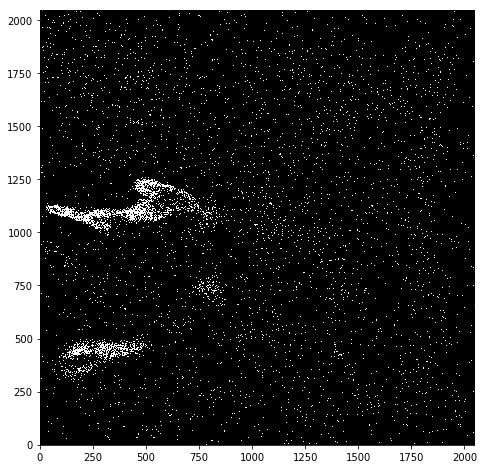

In [7]:
for i in range(9):
    doAnalysis(selects[i], suffixes[i])

In [8]:
exps = array([2., 10., 60.])
for i in range(3):
    print "==> Results for %ds darks:" % exps[i]
    print "UTR    - %5.2f ADUs" % RNs[i]
    print "CDS    - %5.2f ADUs" % RNs[3+i]
    print "FOWLER - %5.2f ADUs" % RNs[6+i]

==> Results for 2s darks:
UTR    -  4.35 ADUs
CDS    -  4.32 ADUs
FOWLER -  4.40 ADUs
==> Results for 10s darks:
UTR    -  3.68 ADUs
CDS    -  4.42 ADUs
FOWLER -  4.45 ADUs
==> Results for 60s darks:
UTR    -  2.37 ADUs
CDS    -  4.55 ADUs
FOWLER -  4.61 ADUs


In [18]:
exps = array([1.6, 9.8, 58.8])
cdss = array(RNs[3:6])
fwls = array(RNs[6:9])

print cdss
print fwls

print (cdss[2]**2-cdss[0]**2)/(exps[2]-exps[0])*5.78
print (fwls[2]**2-fwls[0]**2)/(exps[2]-exps[0])*5.78


[4.32267196 4.41585744 4.54575201]
[4.39961665 4.44944674 4.61104521]
0.1999120509213503
0.19250949192778605
